<a href="https://colab.research.google.com/github/edroga/Advanced-Machine-Learning-Specialization/blob/master/covid19_data_analysis_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

------------------------------------------


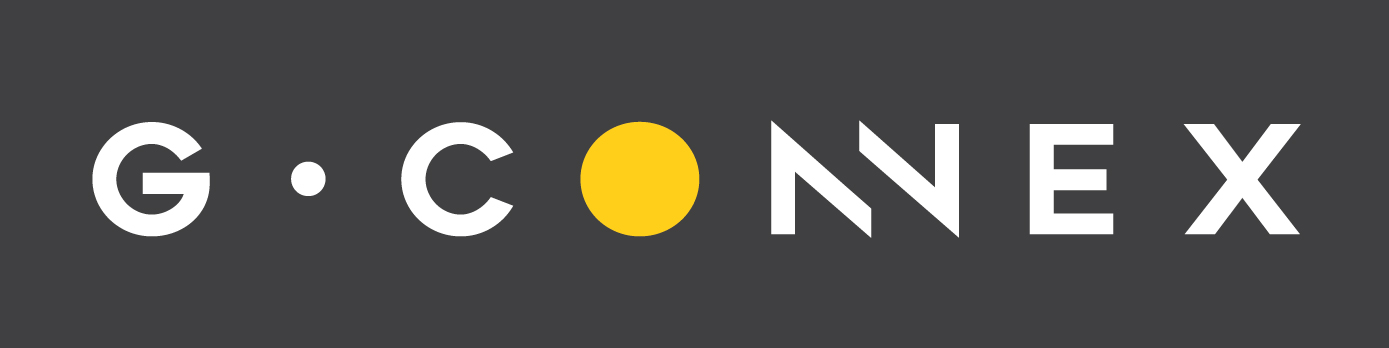

------------------------------------------
# Análisis de datos __Covid19__
------------------------------------------

Clase muestra del curso __P4D__


Cuando hacemos análisis de datos, siempre nos enfrentaremos a problemas que resolver y preguntas que responder. Parte de nuestro trabajo consiste en:

* Trabajar con diferentes fuentes de datos.
* Saber cuáles son los pasos que se deben seguir para preparar los de datos 
* Cómo encontrar buenas métricas para establecer un análisis

El propósito de este proyecto y la pregunta que intentaremos responder al final de nuestro análisis es:

__¿Existe alguna relación entre la propagación del covid19 en un país y lo feliz que vive la gente en ese país?__

Para responder lo anterior, vamos a trabajar con dos datasets:

* El dataset Covid19 publicado por la [Universidad John Hopkins](https://coronavirus.jhu.edu/), que consiste en los datos acumulado de casos confirmados en diferentes países por día.

* El dataset del [informe de la felicidad mundial](https://worldhappiness.report/). El informe es una publicación anual de las Naciones Unidas y consta de puntuaciones otorgadas por las personas que viven en diferentes países a varios factores de la vida, como la libertad para tomar decisiones, esperanza de vida saludable, apoyo social, etc.

La idea es fusionar estos dos datasets y calcular una métrica que pueda ayudarnos a encontrar la respuesta a la pregunta que nos hemos planteado y al final, visualizar algunos resultados

## 1 Importar paquetes y datos

### 1.1 Importamos todos los paquetes de python necesarios para nuestro análisis

In [ ]:
# Para ejecutar las celdas darle click en el botón de play o también se puede oprimir la combinación de las teclas ctrl + enter


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

pd.set_option('display.max_rows', 500)

### 1.2 Importamos el dataset covid19

In [2]:
covid19 = pd.read_csv('https://raw.githubusercontent.com/edroga/Datasets_for_projects/main/covid19.csv')

### 1.3 Revisamos la estructura del dataset

In [ ]:
# usar un atributo .dtypes
covid19.dtypes

In [4]:
# usar el atributo .shape de covid19
covid19.shape

(266, 104)

In [7]:
# usar un método .head() sobre covid19
covid19.head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,3,3,7,7,7,7,7,7,7,9,15,15,15,15,19,19,19,19,21,21,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,266,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451,1451,1554,1628,1715,1795,1975,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,194,235,249,265,290,329,407,424,482,532,571,663,736,770,822,833,853,881,921,937,967,1013,1039,1067,1111,1159,1201,1248,1291,1339,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19,32,39,39,53,62,71,77,78,80,84,87,91,93,96,96,96,99,100,103,103,103,102,103,103,103,103,103,103,104,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,669,669,818,1029,1219,1405,1617,1791,2032,2032,2182,2298,2389,2493,2580,2637,2686,2734,2773,2822,2857,2857,2863,2870,2886,2897,2926,2936,2957,2963,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


### 1.4 Eliminamos columnas que no usaremos

In [8]:
covid19.drop(['Lat', 'Long'], axis=1, inplace=True)

In [9]:
# usar un método .head() sobre covid19
covid19.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27


## 2 Agregamos la información

### 2.1 Agregamos la información por país

In [10]:
corona_dataset_aggregated = covid19.groupby('Country/Region').sum()

In [13]:
# usar un método .head() sobre corona_dataset_aggregated
corona_dataset_aggregated.head(20)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,3,3,7,7,7,7,7,7,7,9,15,15,15,15,19,19,19,19,21,21,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24
Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,266,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451,1451,1554,1628,1715,1795,1975,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
Armenia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,194,235,249,265,290,329,407,424,482,532,571,663,736,770,822,833,853,881,921,937,967,1013,1039,1067,1111,1159,1201,1248,1291,1339,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
Australia,0,0,0,0,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,25,27,...,1549,1682,2044,2364,2810,3143,3640,3984,4361,4559,4862,5116,5330,5550,5687,5797,5895,6010,6108,6215,6303,6315,6351,6415,6440,6462,6522,6568,6610,6623,6645,6652,6662,6677,6694,6714,6721,6744,6752,6766


In [14]:
# usar el atributo .shape de corona_dataset_aggregated
corona_dataset_aggregated.shape

(187, 100)

### 2.2 Inspeccion visual de casos acumulados

Veamos algunas visualizaciones de los casos acumulados en algunos paises. Recuerda que las visualizaciones siempre nos ayuda a entender mejor nuestros datos.

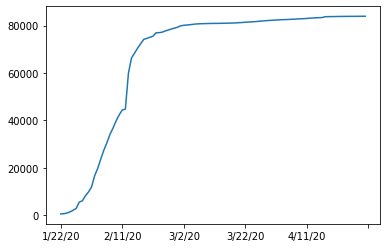

In [15]:
corona_dataset_aggregated.loc['China'].plot()

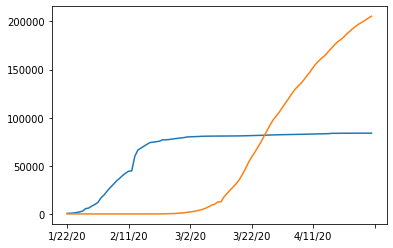

In [16]:
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['Italy'].plot()

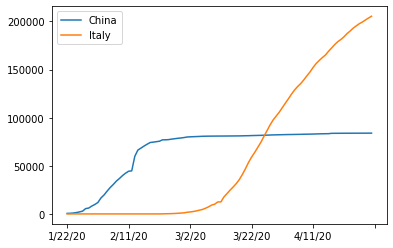

In [17]:
# usar plt.legend()
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['Italy'].plot()
plt.legend()

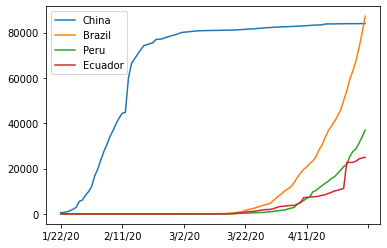

In [20]:
# Visualiza tu país de origen
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['Brazil'].plot()
corona_dataset_aggregated.loc['Peru'].plot()
corona_dataset_aggregated.loc['Ecuador'].plot()
plt.legend()

## 3 Selección de una métrica que represente la propagación del virus en un país

### 3.1 Resumiendo los resultados con una métrica

Necesitamos encontrar una forma de representar todas las medidas con un solo número, un número que pueda describir la forma en la que se ha esparcido el virus dentro de cada país. 

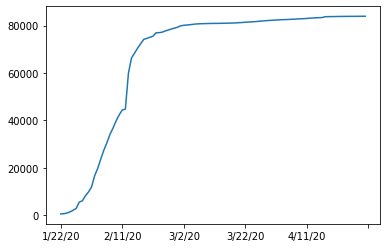

In [21]:
corona_dataset_aggregated.loc['China'].plot()

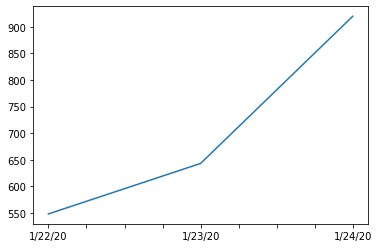

In [22]:
# gráfiquemos los días 22, 23 y 24 de enero del 2020
corona_dataset_aggregated.loc['China'][:3].plot()

Analicemos un poco la gráfica

* ¿Cuántos nuevos casos confirmados hubo del 22 al 23 de enero?

* ¿Cuántos nuevos casos confirmados hubo del 23 al 24 de enero?

* ¿Cómo encontramos una métrica que describa la propagación en este periodo?

Podríamos usar:

* Número promedio de nuevos casos confirmados
* Máximo número de nuevos casos confirmados



Usemos el máximo número de nuevos casos confirmados

### 3.2 Cálculo de las diferencias

In [ ]:
# usar el método diff() sobre corona_dataset_aggregated.loc['China']
corona_dataset_aggregated.loc['China'].diff()

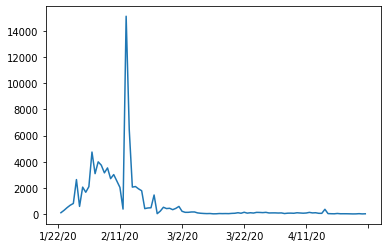

In [24]:
# usar el método plot() sobre corona_dataset_aggregated.loc['China'].diff() para visualizar el cambio en la tasa día a día
corona_dataset_aggregated.loc['China'].diff().plot()

### 3.2 Buscamos la cantidad máxima de infecciones

In [25]:
# Usar el método .max() sobre corona_dataset_aggregated.loc['China'].diff()
corona_dataset_aggregated.loc['China'].diff().max()

15136.0

¿Cómo podemos interpretar el número que acabamos de obtener?

In [27]:
# Hacer lo mismo para otro país
corona_dataset_aggregated.loc['Mexico'].diff().max()

1425.0

### 3.3 Buscamos la cantidad máxima de infecciones para todos los países

In [28]:
countries = corona_dataset_aggregated.index.tolist()

In [ ]:
countries

In [30]:
max_infections = [corona_dataset_aggregated.loc[c].diff().max() for c in countries]

In [ ]:
max_infections

In [32]:
#creamos una nueva columna en el dataset agregado
corona_dataset_aggregated['max_infections'] = max_infections

In [33]:
# usar un método .head() sobre corona_dataset_aggregated
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infections
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,5.0


### 3.4 Creamos un DataFrame solo con las columnas que necesitamos

In [34]:
corona_data = corona_dataset_aggregated[['max_infections']]

In [36]:
# usar un método .head() sobre corona_data
corona_data.head(20)

,max_infections
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
Antigua and Barbuda,6.0
Argentina,291.0
Armenia,134.0
Australia,497.0


## 4 Informe de la felicidad mundial

### 4.1 Importamos los datos

In [37]:
happiness_report_csv = pd.read_csv('https://raw.githubusercontent.com/edroga/Datasets_for_projects/main/worldwide_happiness_report.csv')

In [38]:
happiness_report_csv.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### 4.2 Eliminamos las columnas que no necesitamos

In [39]:
happiness_report_csv.drop(['Overall rank',	'Score', 'Generosity', 'Perceptions of corruption'], axis=1, inplace=True)

In [40]:
# usar un método .head() sobre happiness_report_csv
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### 4.3 Asignar nuevas etiquetas a los indices del DataFrame

In [41]:
happiness_report_csv.set_index('Country or region', inplace=True)

In [42]:
# usar un método .head() sobre happiness_report_csv
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### 4.4 Integración de información de los datasets __covid19__ y __world happiness report__

#### 4.4.1 Recordemos la estructura del dataset agregado de covid19

In [47]:
# usar un método .head() sobre corona_data
corona_data.head(10)

,max_infections
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
Antigua and Barbuda,6.0
Argentina,291.0
Armenia,134.0
Australia,497.0


In [44]:
# usar el atributo .shape de corona_data
corona_data.shape

(187, 1)

#### 4.4.2 Recordemos la estructura del dataset wolrd happiness report

In [48]:
# usar un método .head() sobre happiness_report_csv
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [49]:
# usar el atributo .shape de happiness_report_csv
happiness_report_csv.shape

(156, 4)

#### 4.4.3 Integramos la información

In [50]:
data = corona_data.join(happiness_report_csv, how='inner')


In [51]:
# usar un método .head() sobre data
data.head()

,max_infections,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### 4.5 Obtenemos la matriz de correlaciones

In [52]:
data.corr()

,max_infections,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infections,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### 4.6 Obtener el log del máximo de infecciones

In [53]:
data['log_max_infections'] = np.log(data['max_infections'])

In [54]:
data.head()

,max_infections,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,log_max_infections
Afghanistan,232.0,0.350,0.517,0.361,0.000,5.446737
Albania,34.0,0.947,0.848,0.874,0.383,3.526361
Algeria,199.0,1.002,1.160,0.785,0.086,5.293305
Argentina,291.0,1.092,1.432,0.881,0.471,5.673323
Armenia,134.0,0.850,1.055,0.815,0.283,4.897840


In [55]:
# usar un método .corr() sobre data
data.corr()

,max_infections,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,log_max_infections
max_infections,1.000000,0.250118,0.191958,0.289263,0.078196,0.607997
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603,0.587793
Social support,0.191958,0.759468,1.000000,0.765286,0.456246,0.410554
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892,0.545679
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000,0.256415
log_max_infections,0.607997,0.587793,0.410554,0.545679,0.256415,1.000000


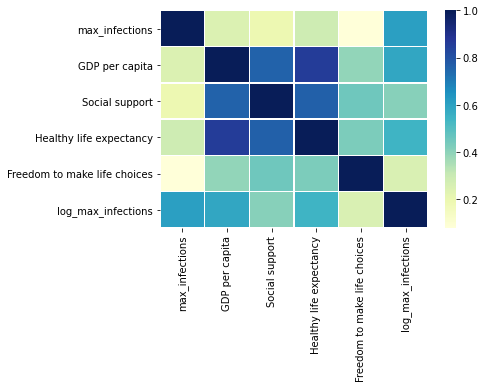

In [56]:
sns.heatmap(data.corr(), linewidths=.5, cmap="YlGnBu")

## 5 Visualización de resultados

In [57]:
data.head()

,max_infections,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,log_max_infections
Afghanistan,232.0,0.350,0.517,0.361,0.000,5.446737
Albania,34.0,0.947,0.848,0.874,0.383,3.526361
Algeria,199.0,1.002,1.160,0.785,0.086,5.293305
Argentina,291.0,1.092,1.432,0.881,0.471,5.673323
Armenia,134.0,0.850,1.055,0.815,0.283,4.897840


### Task 5.1: Plotting GDP vs maximum Infection rate

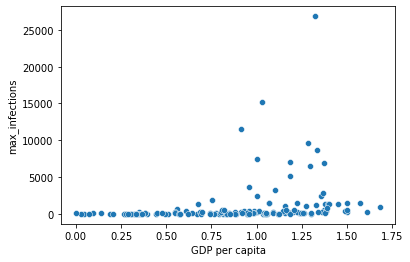

In [58]:
sns.scatterplot(x = data['GDP per capita'], 
                y = data['max_infections'])

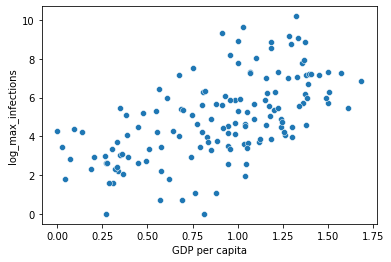

In [59]:
sns.scatterplot(x = data['GDP per capita'], 
                y = data['log_max_infections'])

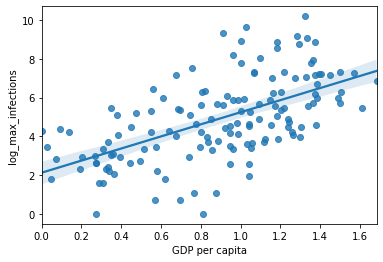

In [60]:
sns.regplot(x = data['GDP per capita'],
            y = data['log_max_infections'])

Hemos encontrado un resultado muy interesante en este análisis: 

__El análisis da indicios de que las personas que viven en países desarrollados son más propensos a contraer la infección del covid19 comparados con las personas que viven en países menos desarrollados__.

Puntos a debatir y siguientes pasos:

* los países menos desarrollados no hacen tantas pruebas de detección
* Probar este análisis con las muertes acumuladas


### 5.2 Visualizaciones interactivas

#### 5.2.1 Infecciones máximas reportadas

In [61]:
corona_sorted = (corona_data
                 .sort_values(by='max_infections', ascending=False)
                 .loc[lambda row: row['max_infections']>100])

In [62]:
f = go.Figure()

trace = go.Bar(y=corona_sorted['max_infections'], 
               x=corona_sorted.index.tolist())

f.add_trace(trace)

layout = go.Layout(title = 'Infecciones máximas reportadas',
                   titlefont = {'family':'Arial',
                                'size'  :15},
                   xaxis = {'tickangle':90})

f.update_layout(layout)

f.show()

#### 5.2.2 Bubble chart

In [ ]:
data.head()

In [63]:
f = go.Figure()

trace = go.Scatter(
    x = data['GDP per capita'],
    y = data['log_max_infections'],
    mode = 'markers',
    text = data.index.tolist(),
    hovertemplate ='<i>log max</i>: %{y}'+
                   '<br><b>GDP</b>: %{x}<br>'+
                   '<b>%{text}</b>',
    marker= dict(size = data['Healthy life expectancy']*20,
                 color = data['Social support'],
                 colorscale = 'Magma',
                 showscale = True)
    )

f.add_trace(trace)

layout = go.Layout(title = 'GDP vs log_max_infections',
                   hovermode = 'closest',
                   xaxis = {'title': 'GPD per capita'},
                   yaxis = {'title': 'log de infecciones máximas'},
                   hoverlabel = {'bgcolor':"white",
                                 'font_size'  :16,
                                 'font_family':"Rockwell"},
                   template = 'none')

f.update_layout(layout)

f.show()

In [65]:
f.write_html("infecciones_dos_viz.html")